In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D


In [2]:
spotify_data = pd.read_csv("fixed_cleaned_spotify_data.csv")
spotify_data.head()


,track,artist,uri,danceability,energy,tempo
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,133.061
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,92.988
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,86.964
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,148.440
4,I Got A Feelin,Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,112.098


In [3]:
spotify_data['energy'] = spotify_data['energy'].multiply(100)
spotify_data['danceability'] = spotify_data['danceability'].multiply(100)
spotify_data

,track,artist,uri,danceability,energy,tempo
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,57.8,47.1,133.061
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,70.4,85.4,92.988
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,16.2,83.6,86.964
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,18.8,99.4,148.440
4,I Got A Feelin,Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,63.0,76.4,112.098
...,...,...,...,...,...,...
41100,(Youre A) Go Nowhere,Reagan Youth,spotify:track:4e86fqSFhqRQk3Z9hm7XHt,39.6,79.5,152.943
41101,La Fiebre de Norma,La Castañeda,spotify:track:43DFcnOZprnVlAFKwgBJ3e,62.1,65.5,134.167
41102,Good Times,Edie Brickell,spotify:track:6UPfnVoOq3y3BvapBIKs8J,56.2,31.4,166.847
41103,Inane,KMFDM,spotify:track:2Ao3Wi4raEOQfKQiU9EU8y,62.2,78.1,120.051


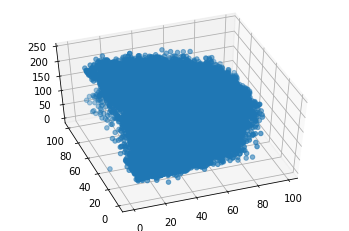

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")
x = spotify_data[["danceability"]]
y = spotify_data[["energy"]]
z = spotify_data[["tempo"]]
ax.scatter(x,y,z)
ax.view_init(50, 250)
plt.show()

In [5]:
#Find Cosine similarity between all the data
# data_for_similarity = pd.DataFrame({'danceability':spotify_data['danceability'],'energy':spotify_data['energy'],'tempo':spotify_data['tempo']})
# from sklearn.metrics.pairwise import cosine_similarity

# similarity = cosine_similarity(data_for_similarity)
# print(similarity)

In [38]:
#Data Preprocessing for model
#Add a songId column for independent variables(needed to be float)
print(len(spotify_data['uri'].unique()))
spotify_data.drop_duplicates(['uri'], keep='last',inplace=True)
spotify_data.reset_index(drop=True, inplace=True)
spotify_data['song_id']= [i for i,uri in enumerate(spotify_data['uri'])] 
print(spotify_data)
#Extracting Independent and dependent Variable  
y= spotify_data.iloc[:,[6]].values  
x= spotify_data.iloc[:,[3,4,5]].values  
  
# # # Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
  
# # #feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)    

40559
                                    track             artist  \
0                               Lucky Man  Montgomery Gentry   
1                          On The Hotline       Pretty Ricky   
2                      Clouds Of Dementia         Candlemass   
3                Heavy Metal, Raise Hell!      Zwartketterij   
4                          I Got A Feelin   Billy Currington   
...                                   ...                ...   
40554                (Youre A) Go Nowhere       Reagan Youth   
40555                  La Fiebre de Norma       La Castañeda   
40556                          Good Times      Edie Brickell   
40557                               Inane              KMFDM   
40558  You Can Make History (Young Again)         Elton John   

                                        uri  danceability  energy    tempo  \
0      spotify:track:4GiXBCUF7H6YfNQsnBRIzl          57.8    47.1  133.061   
1      spotify:track:1zyqZONW985Cs4osz9wlsu          70.4    85.4   9

In [40]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestRegressor 
regressor= RandomForestRegressor(n_estimators= 100, random_state=0)  
regressor.fit(x_train, y_train)

/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(random_state=0)

In [41]:
#Predicting the test set result
y_pred = regressor.predict(x_test)  
print(y_pred)

[27186.99 31027.7  10346.99 ... 26365.89 20639.28 19659.67]
